In [160]:
import xarray as xr
import cartopy as cy
import numpy as np

In [218]:
# open dataset 
ds = xr.open_dataset('/Volumes/mbProD/flexpart_management_data/flexpart_management/tmp_data/new_log_pol_ds_asl_v01.nc')
ds1 = xr.open_dataset('/Volumes/mbProD/flexpart_management_data/flexpart_management/tmp_data/new_log_pol_ds_agl.nc')

In [152]:
dss = ds.sum('ZMID')

In [184]:
d1 = dss['CONC'].values.flatten()
d1 = d1[d1>1]

In [187]:
xl = np.geomspace(1,1e4)

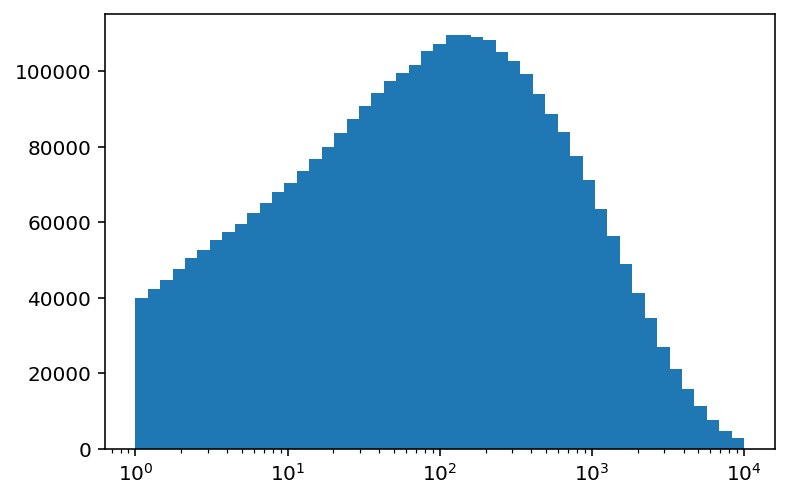

In [189]:
plt.hist(d1,bins=xl)
ax = plt.gca()
ax.set_xscale('log')
# ax.set_yscale('log')

In [195]:
ds.sum('ZMID').quantile([.5,.999])['CONC'].values

array([  23.76506389, 8720.99606141])

In [196]:
ds.sum('TH_CENTER').quantile([.5,.999])['CONC'].values

array([  22.90171955, 5635.21287679])

In [197]:
ds.sum('R_CENTER').quantile([.5,.999])['CONC'].values

array([4.94423939e+00, 8.81298211e+03])

In [212]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [201]:
dd=ds['CONC'].sum(['ZMID','releases'])

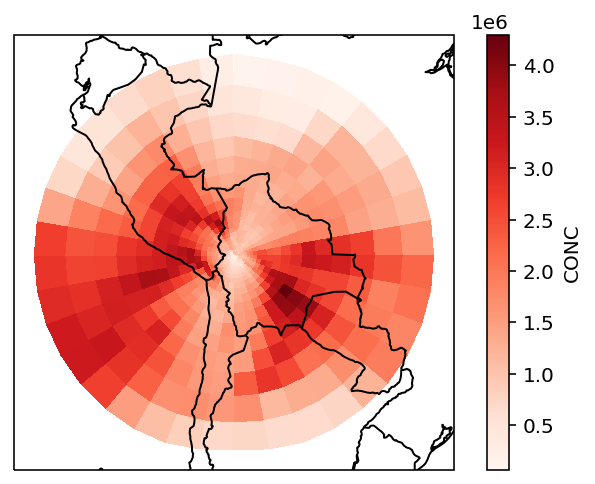

In [215]:
dd.plot(
    x='XLONG',y='XLAT',subplot_kws={'projection':cy.crs.PlateCarree()},
    cmap='Reds'
)
ax = plt.gca()
ax.add_feature(cy.feature.BORDERS)
ax.add_feature(cy.feature.COASTLINE);

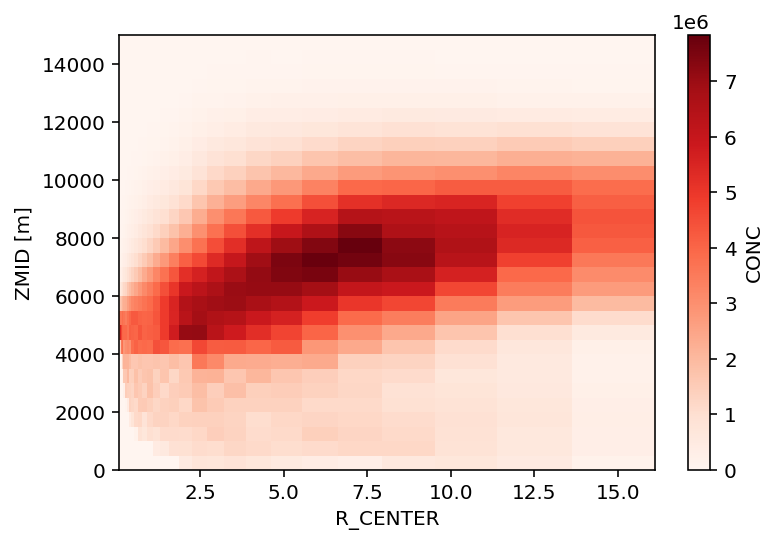

In [217]:
dd=ds['CONC'].sum(['TH_CENTER','releases'])
dd.plot(
    x='R_CENTER',y='ZMID',
#     subplot_kws={'projection':cy.crs.PlateCarree()},
    cmap='Reds'
)

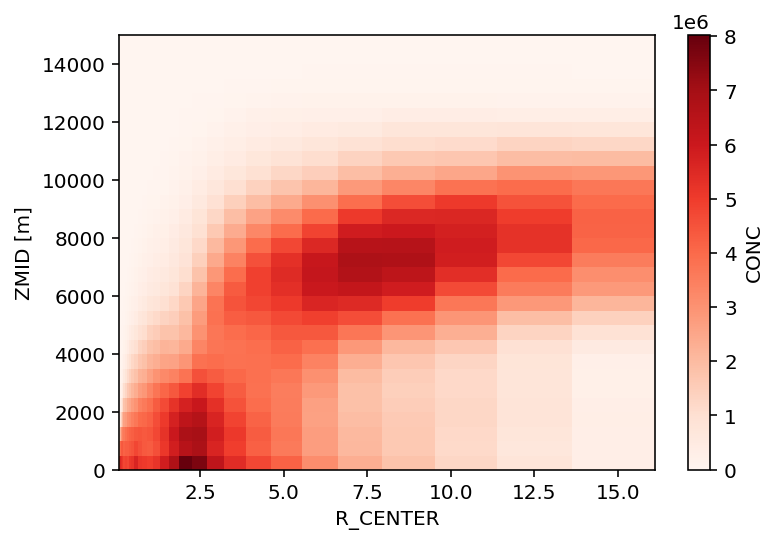

In [219]:
dd=ds1['CONC'].sum(['TH_CENTER','releases'])
dd.plot(
    x='R_CENTER',y='ZMID',
#     subplot_kws={'projection':cy.crs.PlateCarree()},
    cmap='Reds'
)

In [263]:
warnings.simplefilter('ignore',FutureWarning)

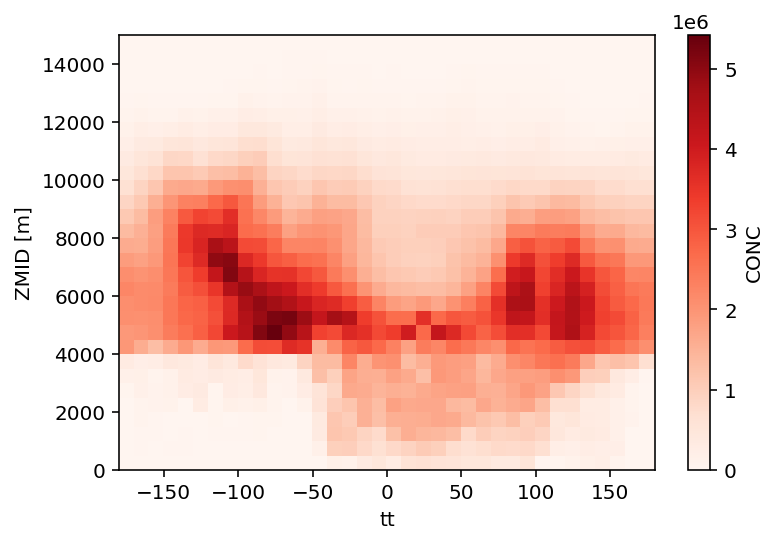

In [264]:
dd=ds['CONC'].sum(['R_CENTER','releases'])
dd = dd.roll({'TH_CENTER':18})

tt = np.mod(
    dd['TH_CENTER'] + np.pi,
    2*np.pi
) - np.pi
tt *=180/np.pi

dd = dd.assign_coords(tt=tt)

dd.plot(
    x='tt',y='ZMID',
#     subplot_kws={'projection':cy.crs.PlateCarree()},
    cmap='Reds'
)

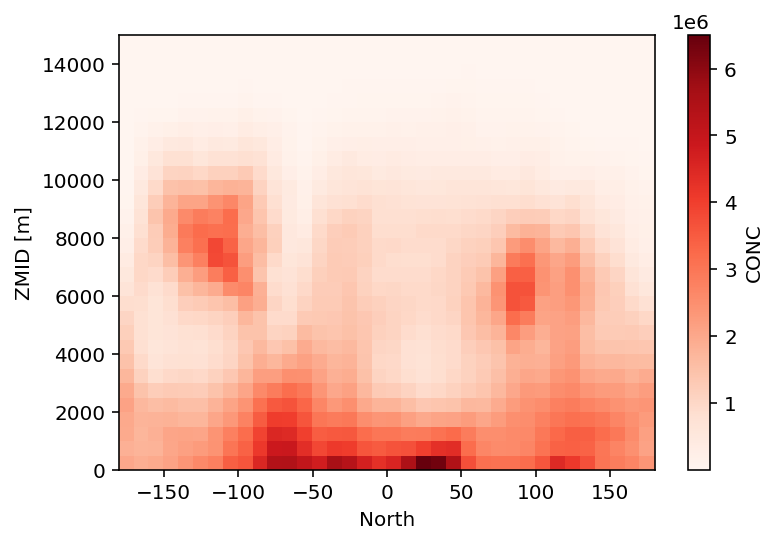

In [267]:
dd=ds1['CONC'].sum(['R_CENTER','releases'])
dd = dd.roll({'TH_CENTER':18})

tt = np.mod(
    dd['TH_CENTER'] + np.pi,
    2*np.pi
) - np.pi
tt *=180/np.pi

dd = dd.assign_coords(North=tt)

dd.plot(
    x='North',y='ZMID',
#     subplot_kws={'projection':cy.crs.PlateCarree()},
    cmap='Reds'
)

In [110]:
# check dataset
ds

<xarray.Dataset>
Dimensions:     (R_CENTER: 30, TH_CENTER: 36, ZMID: 30, releases: 4248)
Coordinates:
  * R_CENTER    (R_CENTER) float64 0.08046 0.09633 0.1153 ... 10.38 12.43 14.88
  * TH_CENTER   (TH_CENTER) float64 0.08727 0.2618 0.4363 ... 5.847 6.021 6.196
    NUM         (R_CENTER) int64 ...
    TOPOGRAPHY  (R_CENTER, TH_CENTER) float64 ...
    XLAT        (R_CENTER, TH_CENTER) float64 ...
    GRIDAREA    (R_CENTER, TH_CENTER) float64 ...
    G_AREA      (R_CENTER, TH_CENTER) float64 ...
    XLONG       (R_CENTER, TH_CENTER) float64 ...
  * releases    (releases) datetime64[ns] 2017-12-06 ... 2018-05-31T23:00:00
    LAT_00      (R_CENTER, TH_CENTER) float64 ...
    LON_00      (R_CENTER, TH_CENTER) float64 ...
    LAT_10      (R_CENTER, TH_CENTER) float64 ...
    LON_10      (R_CENTER, TH_CENTER) float64 ...
    LAT_11      (R_CENTER, TH_CENTER) float64 ...
    LON_11      (R_CENTER, TH_CENTER) float64 ...
    LAT_01      (R_CENTER, TH_CENTER) float64 ...
    LON_01      (R_CENTER, TH_CENTER) float64 ...
  * ZMID        (ZMID) float64 250.0 750.0 1.25e+03 ... 1.425e+04 1.475e+04
Data variables:
    CONC        (R_CENTER, TH_CENTER, releases, ZMID) float64 ...
    AGE         (R_CENTER, TH_CENTER, releases, ZMID) float64 ...

In [284]:
days=np.unique(ds['releases'].dt.strftime('%Y-%m-%d'))

In [324]:
day = days[36]
day

'2018-01-11'

In [325]:
# select the day to plot



# select this day from the dataset
dday = ds.loc[{'releases':day}]

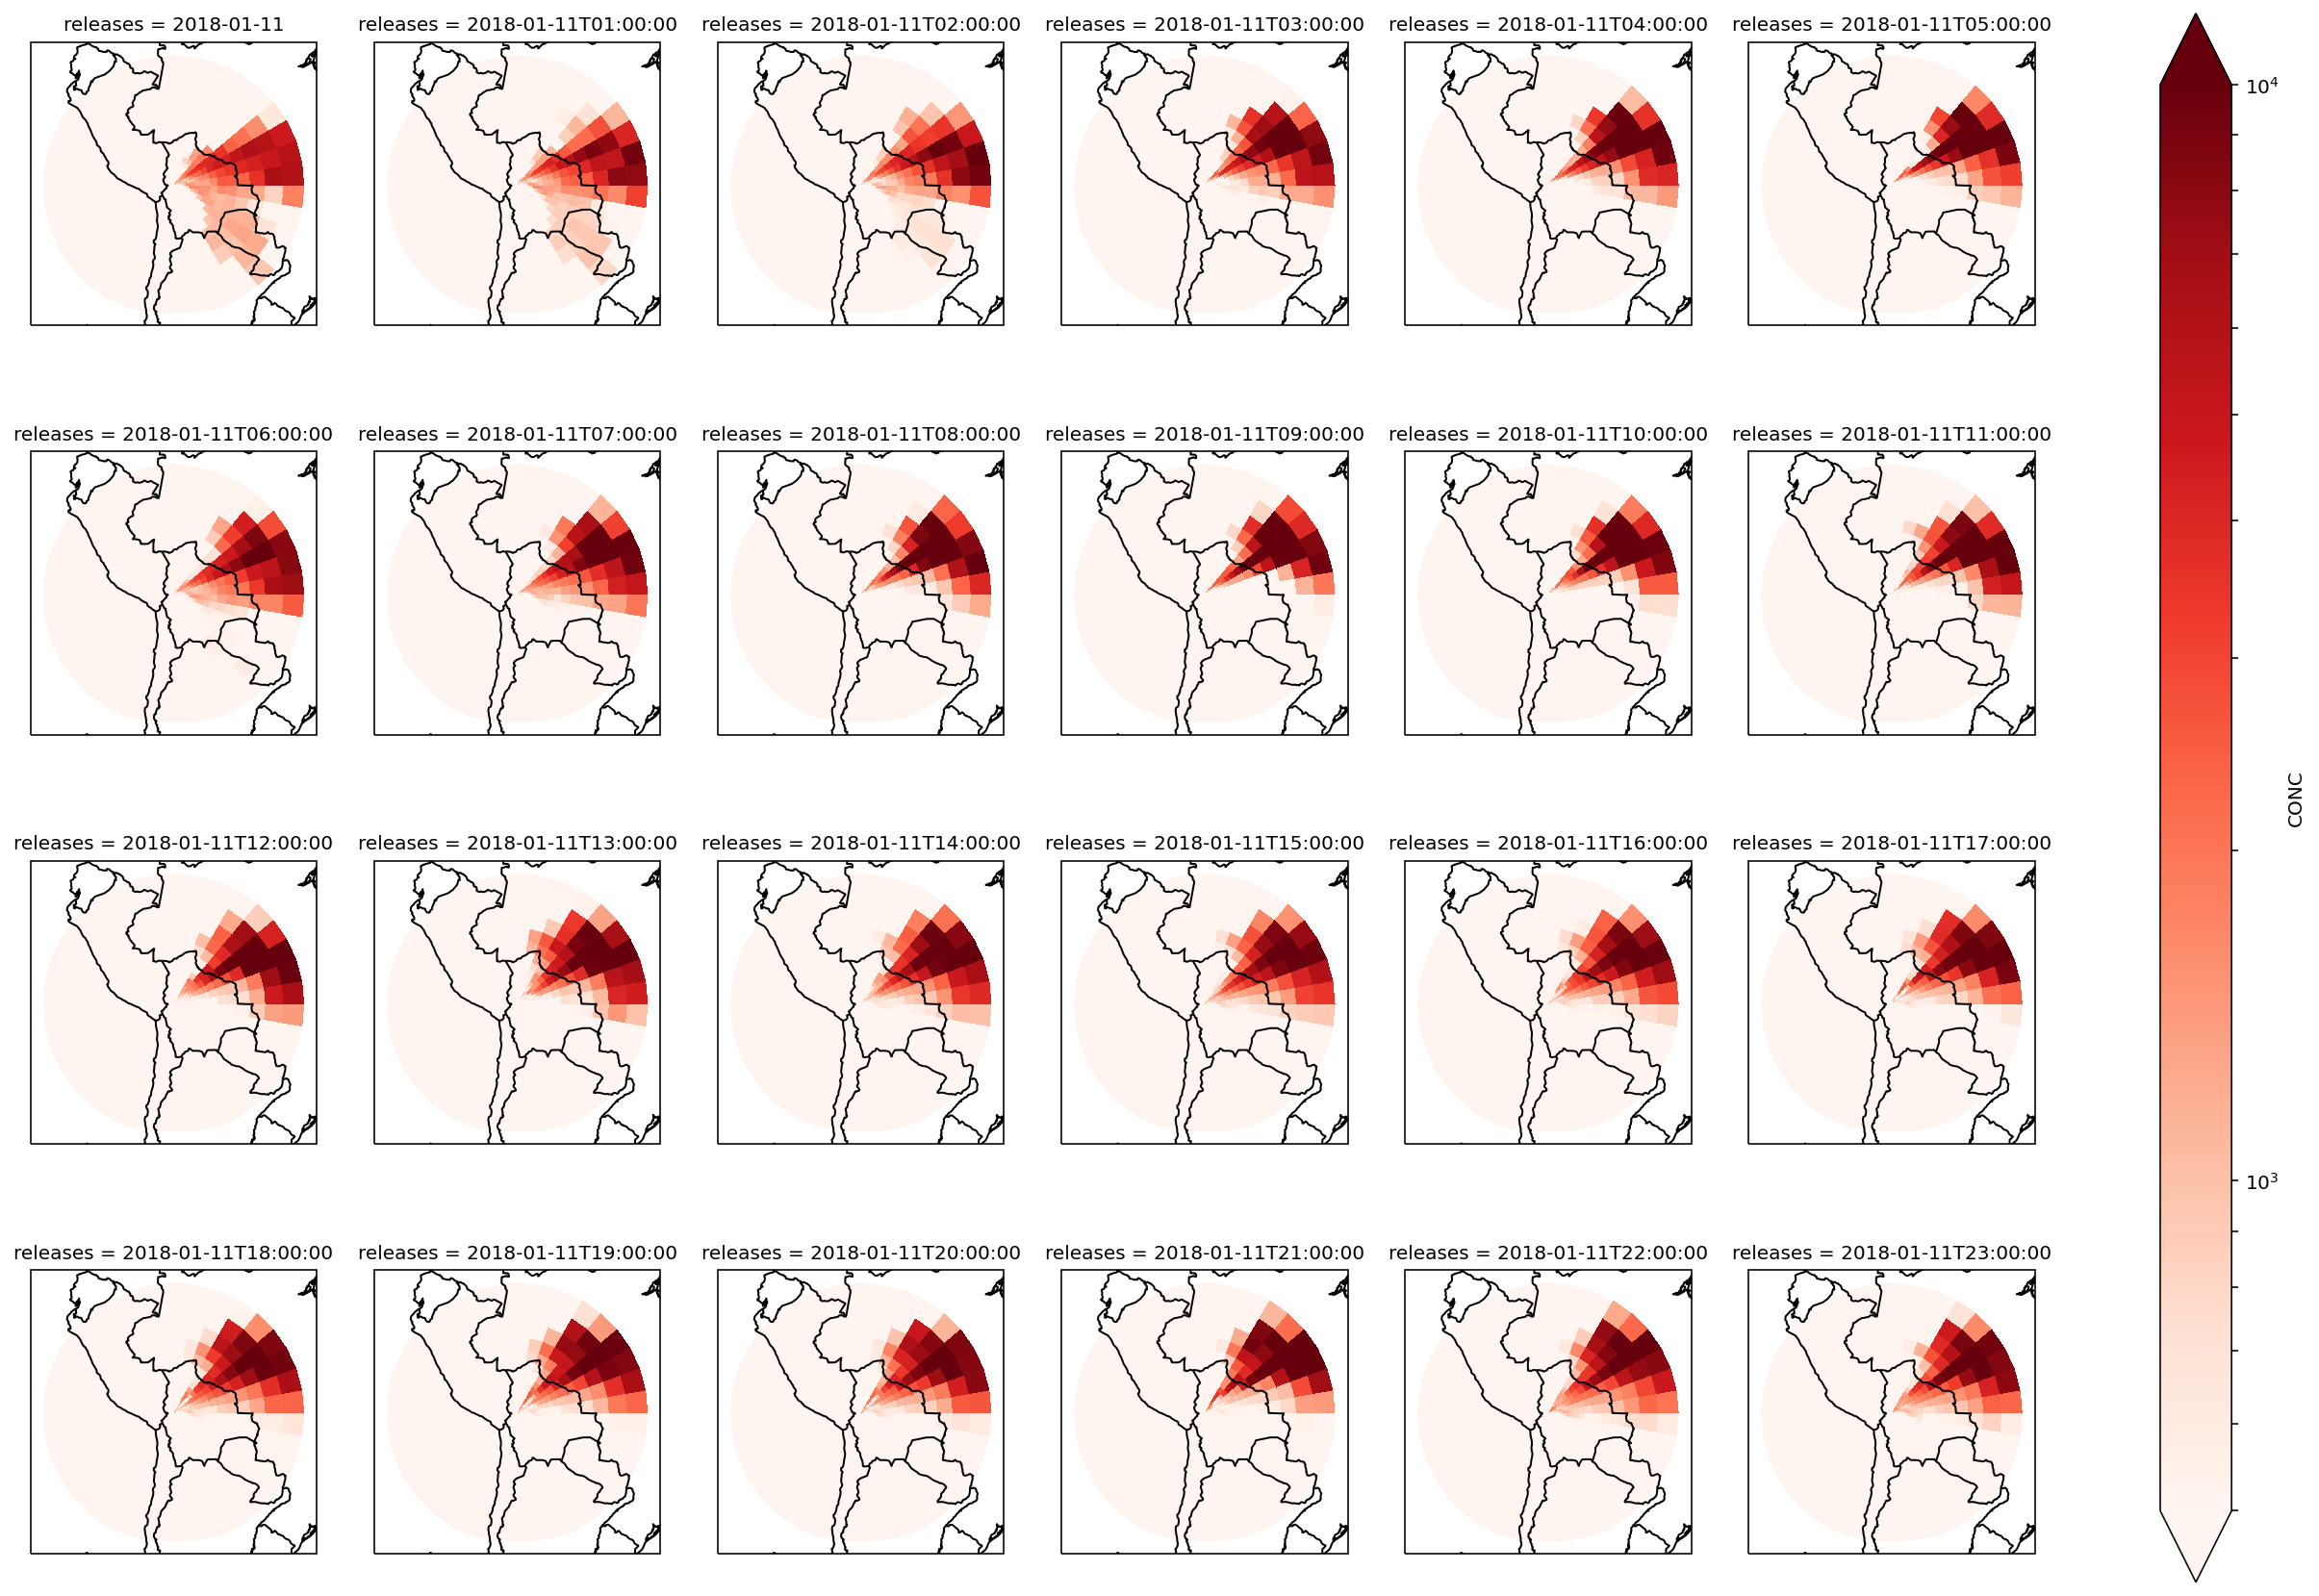

In [326]:
# select the variable CONC 
con = dday['CONC']

# sum over the vertical dimensions
consum = con.sum('ZMID')

#plot
p = consum.plot(
    x='XLONG',y='XLAT',
    #split the plot along the release dimension
    col='releases',
    #force con have a maximum of 6 element per column
    col_wrap=6,
    #use a sym log norm colorbar
    norm=mpl.colors.SymLogNorm(linthresh=1,vmin=500,vmax=10000),
    
    #projection for the map.
    subplot_kws={'projection':cy.crs.PlateCarree()},
    
    # use reds as the color 
    cmap = 'Reds',
    
    # image size
    figsize = (25,15)
    )

for ax in p.axes.flat:
    ax.coastlines()
    ax.add_feature(cy.feature.BORDERS)
#     ax.gridlines()
#     ax.borders()

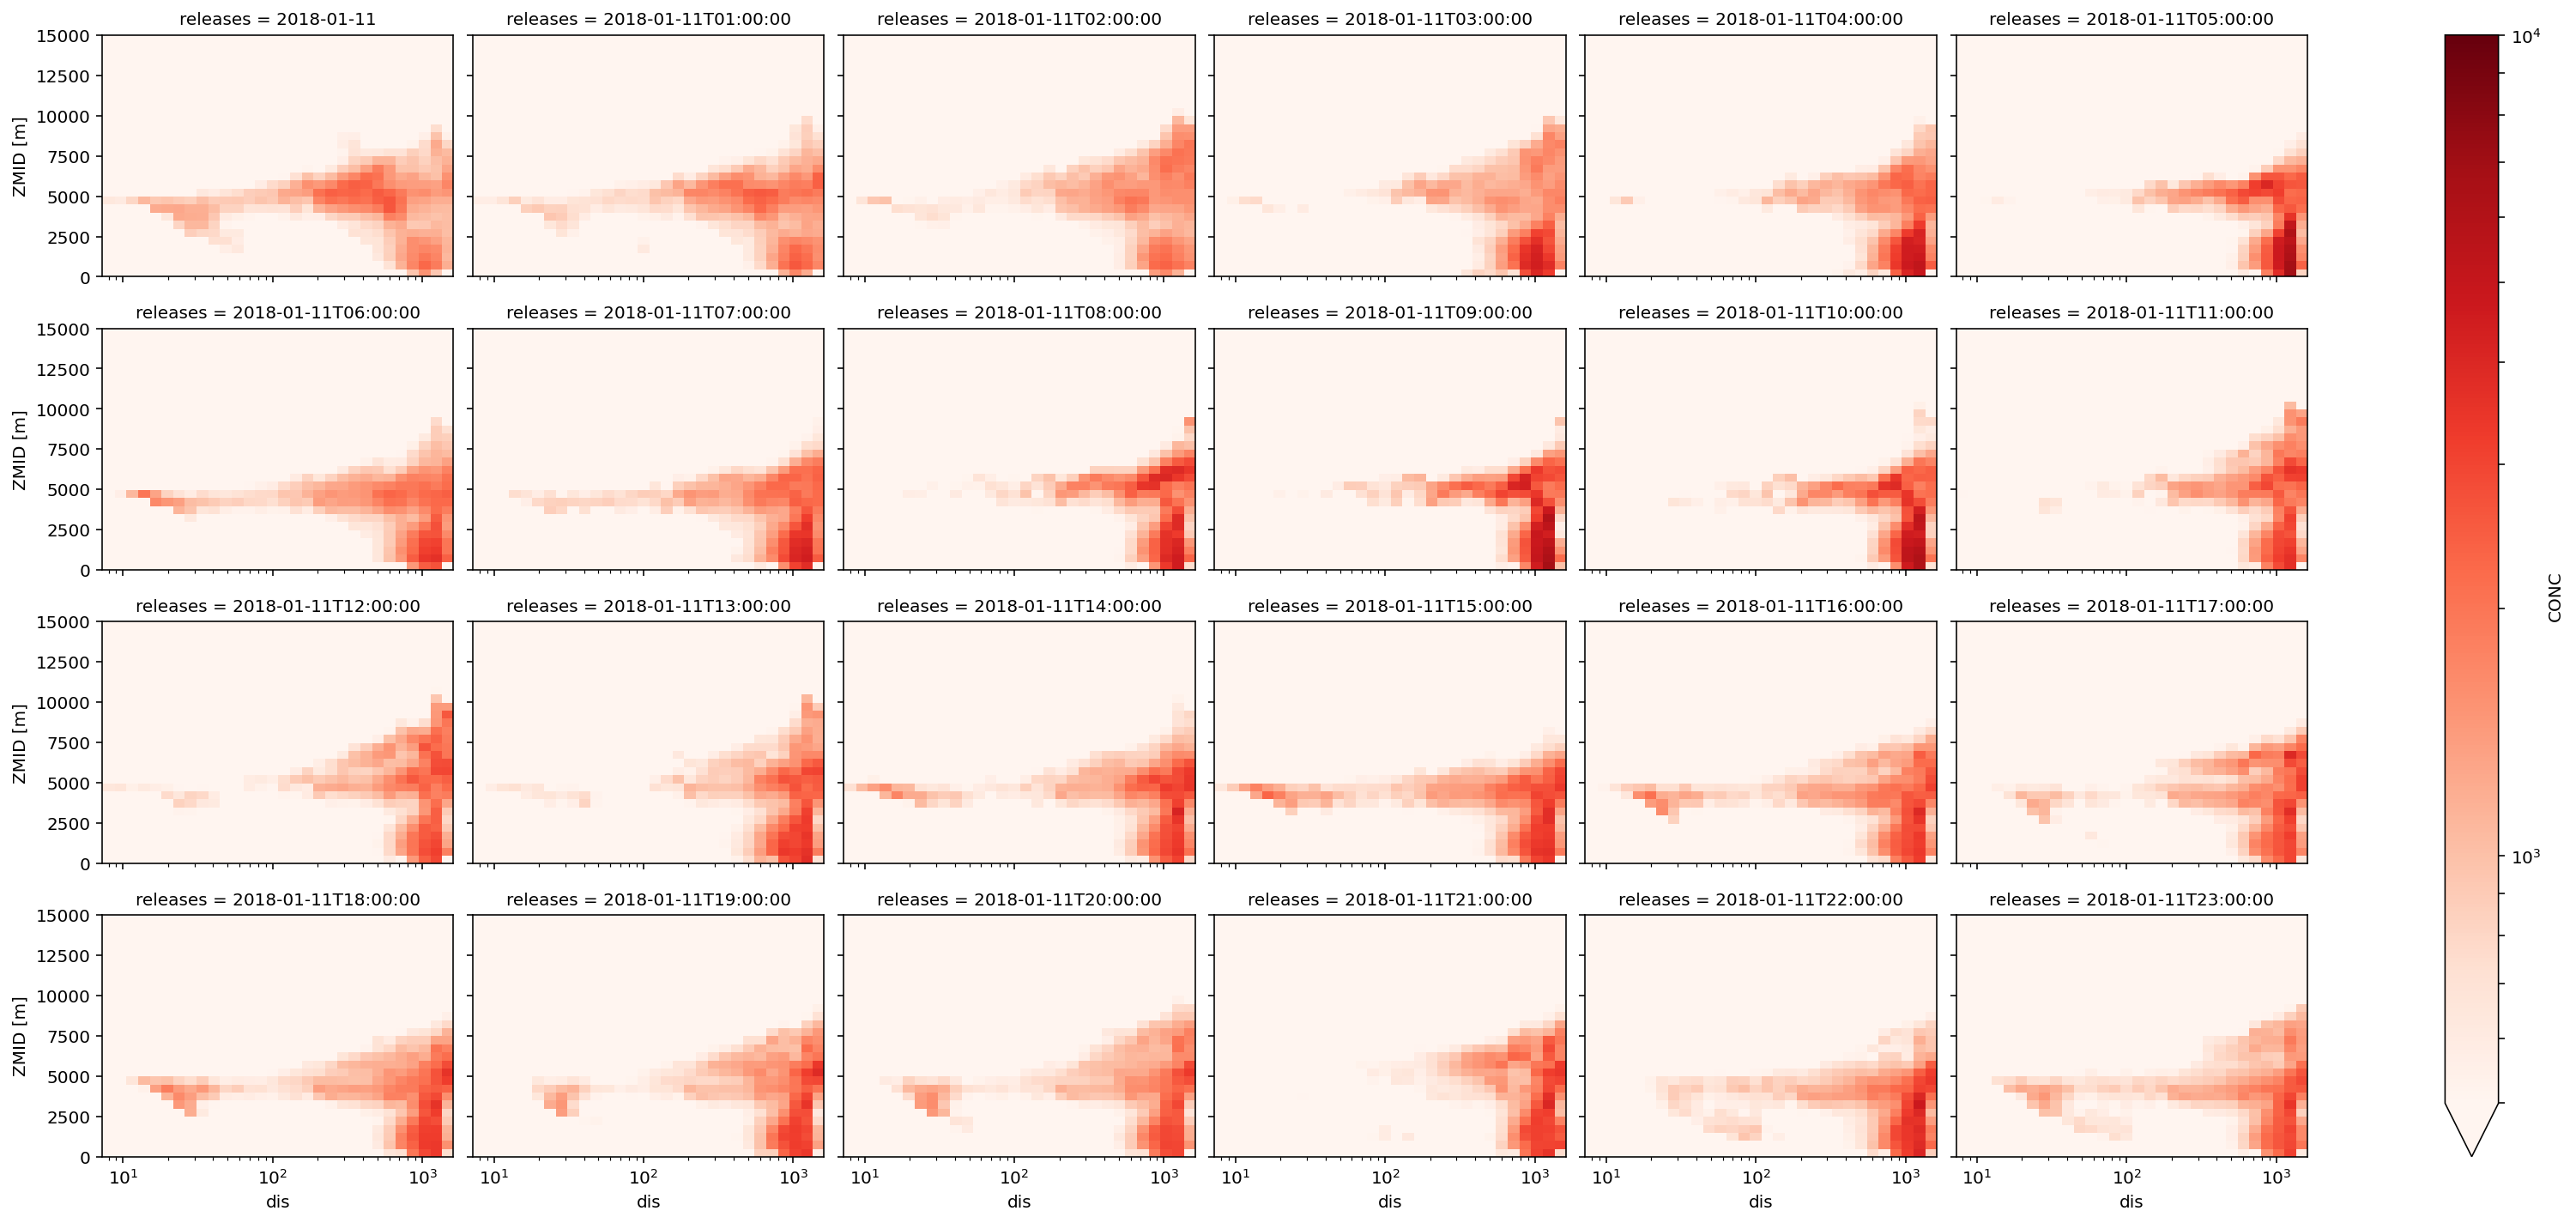

In [327]:
# vertical plots. i.e. summing along the TH dimension. distance [dis] is in km
dday = ds.loc[{'releases':day}]
con = dday['CONC']
consum = con.sum('TH_CENTER')
condis = consum.assign_coords({'dis':consum['R_CENTER']*100})
condis.plot(
    x='dis',y='ZMID',
    col='releases',col_wrap=6,
    norm=mpl.colors.SymLogNorm(linthresh=1,vmin=500,vmax=10000),
    cmap = 'Reds',
    figsize = (25,10),
    xscale='log'
    )


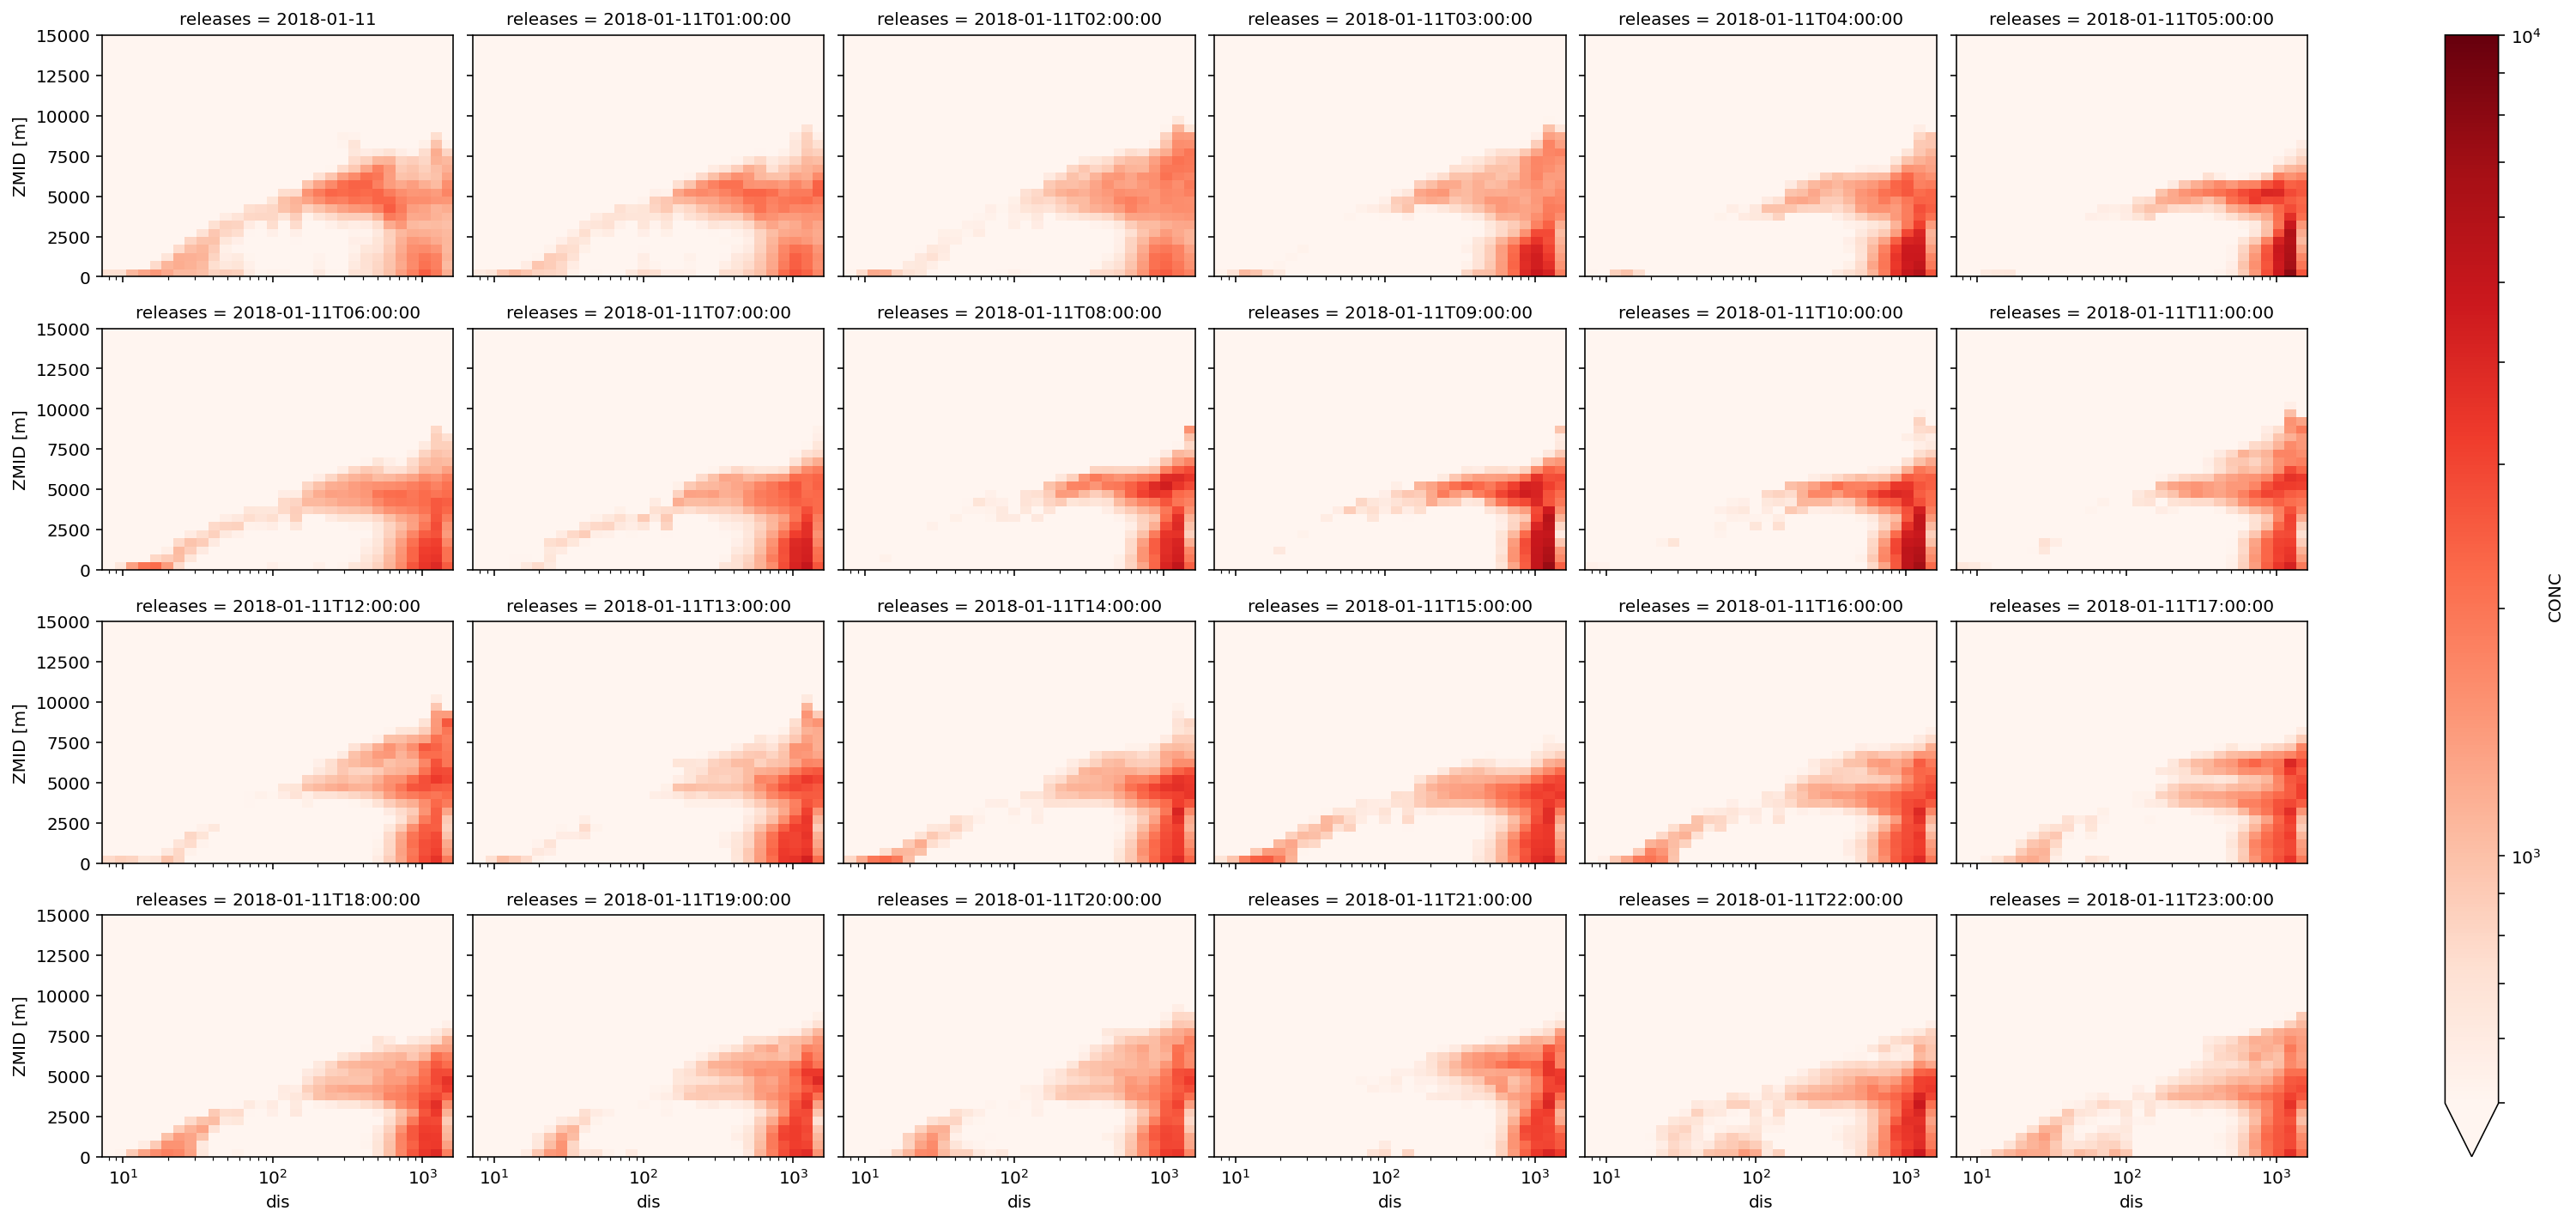

In [328]:
# vertical plots. i.e. summing along the TH dimension. distance [dis] is in km
dday = ds1.loc[{'releases':day}]
con = dday['CONC']
consum = con.sum('TH_CENTER')
condis = consum.assign_coords({'dis':consum['R_CENTER']*100})
condis.plot(
    x='dis',y='ZMID',
    col='releases',col_wrap=6,
    norm=mpl.colors.SymLogNorm(linthresh=1,vmin=500,vmax=10000),
    cmap = 'Reds',
    figsize = (25,10),
    xscale='log'
    )

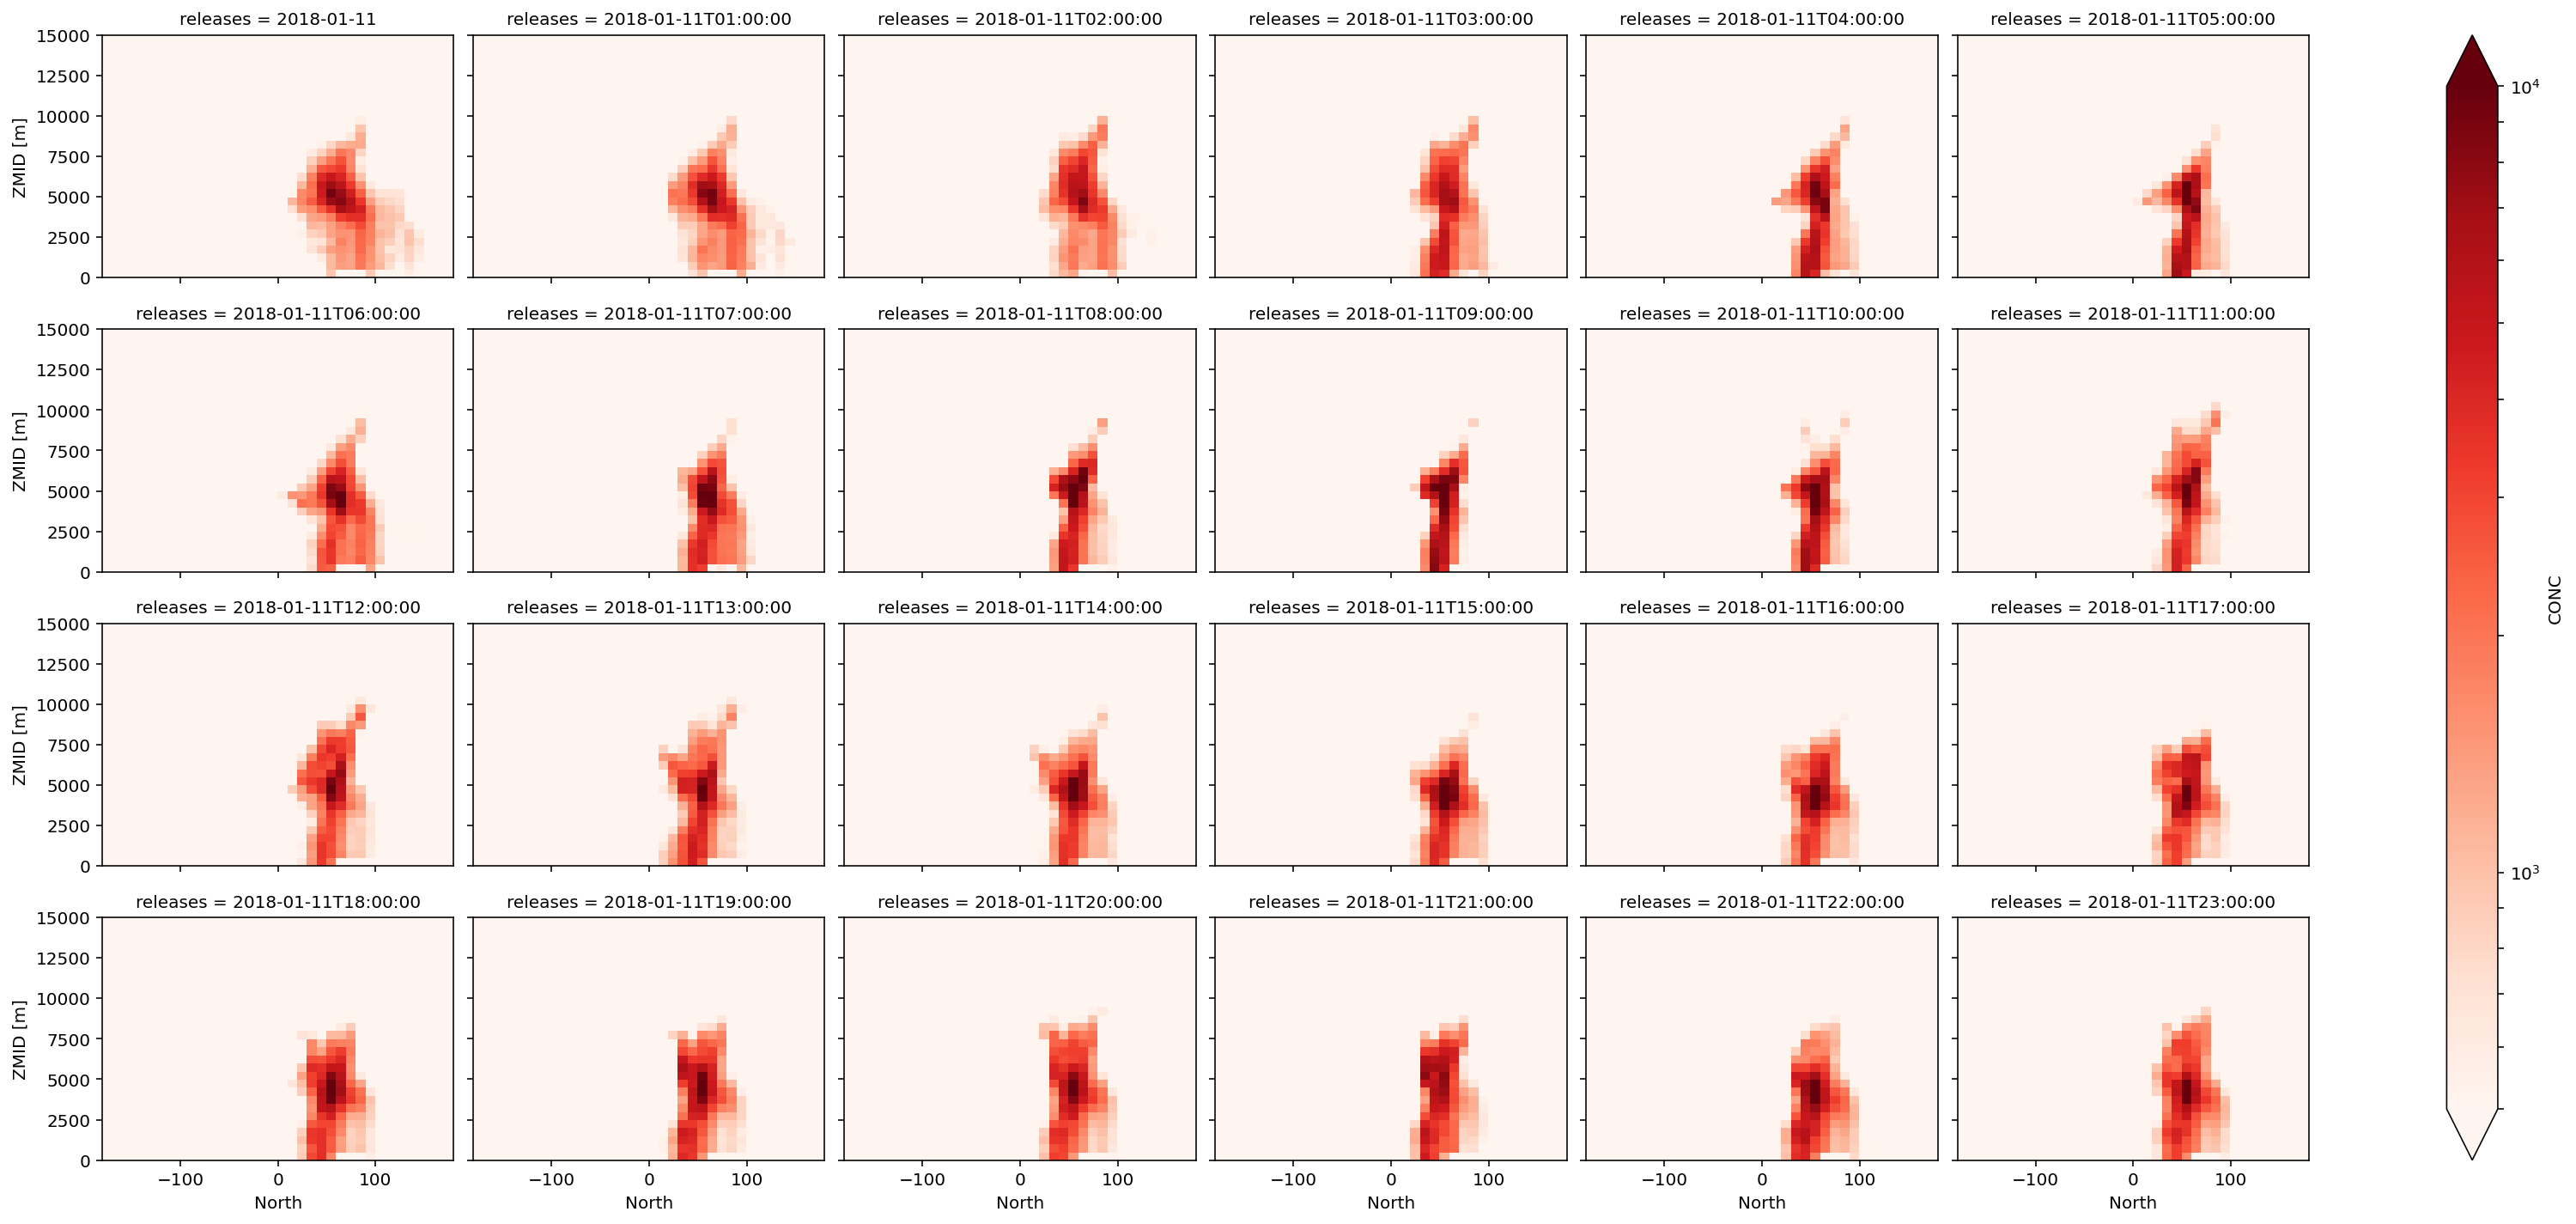

In [329]:
# vertical plots. i.e. summing along the TH dimension. distance [dis] is in km
dday = ds.loc[{'releases':day}]
con = dday['CONC']
consum = con.sum('R_CENTER').roll({'TH_CENTER':18})

tt = np.mod(
    consum['TH_CENTER'] + np.pi,
    2*np.pi
) - np.pi
tt *=180/np.pi

condis = consum.assign_coords(North=tt)
condis.plot(
    x='North',y='ZMID',
    col='releases',col_wrap=6,
    norm=mpl.colors.SymLogNorm(linthresh=1,vmin=500,vmax=10000),
    cmap = 'Reds',
    figsize = (25,10)
    )

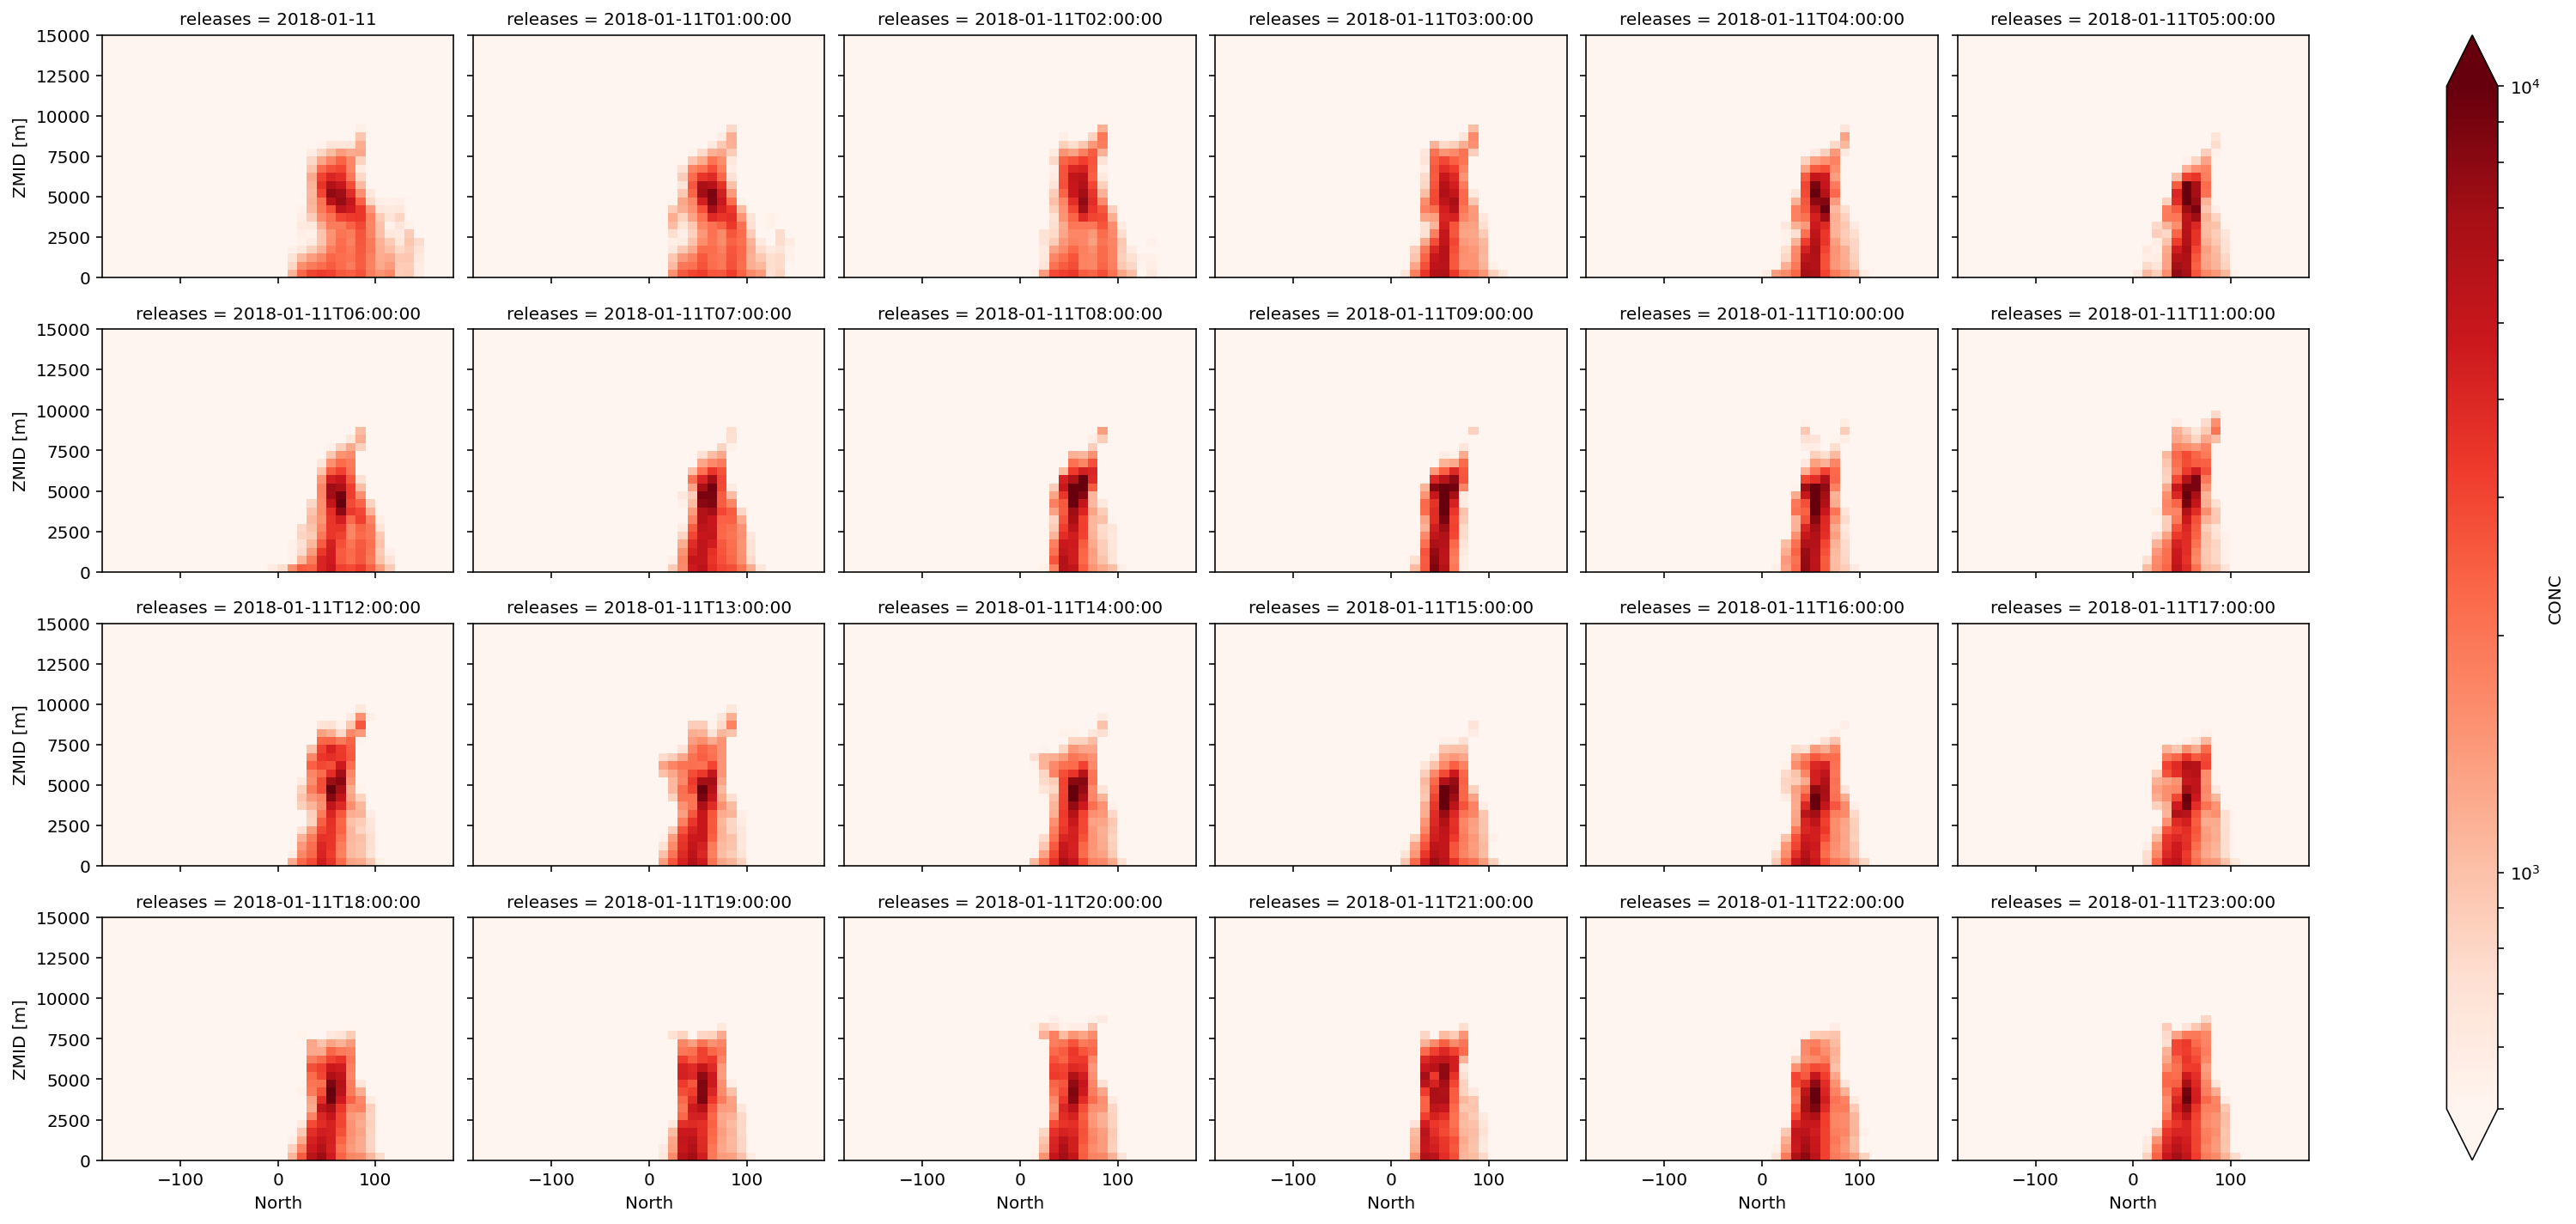

In [330]:
# vertical plots. i.e. summing along the TH dimension. distance [dis] is in km

dday = ds1.loc[{'releases':day}]
con = dday['CONC']
consum = con.sum('R_CENTER').roll({'TH_CENTER':18})

tt = np.mod(
    consum['TH_CENTER'] + np.pi,
    2*np.pi
) - np.pi
tt *=180/np.pi

condis = consum.assign_coords(North=tt)
condis.plot(
    x='North',y='ZMID',
    col='releases',col_wrap=6,
    norm=mpl.colors.SymLogNorm(linthresh=1,vmin=500,vmax=10000),
    cmap = 'Reds',
    figsize = (25,10)
    )